### Analisis Exploratorio

Librerias

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import skew
from math import sqrt
from numpy import mean, var
from sklearn import preprocessing
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('steam_games.csv')

Diccionario:

User_Id: Esta columna parece ser un identificador de usuario o jugador.

App_Name: Representa el nombre de una aplicación o juego.

Release_Date: Muestra la fecha de lanzamiento de la aplicación o juego.

Release_Year: Indica el año de lanzamiento de la aplicación o juego. Parece ser una versión resumida de la fecha de lanzamiento.

Price: Indica el precio de la aplicación o juego.

Genres: Describe los géneros asociados a la aplicación o juego, separados por comas.

Specs: Muestra especificaciones técnicas o características de la aplicación o juego, separadas por comas.

Early_Access: Un valor booleano que indica si la aplicación o juego está disponible en acceso anticipado (Early Access). True significa que está en acceso anticipado, False significa que no lo está.

Developer: Representa el desarrollador o creador de la aplicación o juego.

Publisher: Indica la editorial o empresa que publicó la aplicación o juego.

In [3]:
df.shape

(27179, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27179 entries, 0 to 27178
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User_Id       27179 non-null  int64  
 1   App_Name      27143 non-null  object 
 2   Release_Date  27179 non-null  object 
 3   Release_Year  27179 non-null  int64  
 4   Price         27179 non-null  float64
 5   Genres        27179 non-null  object 
 6   Specs         27179 non-null  object 
 7   Early_Access  27179 non-null  bool   
 8   Developer     27126 non-null  object 
 9   Publisher     27140 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 1.9+ MB


In [61]:
df.head()

,User_Id,App_Name,Release_Date,Release_Year,Price,Genres,Specs,Early_Access,Developer,Publisher
0,761140,Lost Summoner Kitty,2018-01-04,2018,4.99,"Action, Casual, Indie, Simulation, Strategy",Single-player,False,Kotoshiro,kotoshiro
1,643980,Ironbound,2018-01-04,2018,0.00,"Free to Play, Indie, RPG, Strategy","Single-player, Multi-player, Online Multi-Play...",False,Secret Level Srl,making fun inc
2,670290,Real Pool D Poolians,2017-07-24,2017,0.00,"Casual, Free to Play, Indie, Simulation, Sports","Single-player, Multi-player, Online Multi-Play...",False,Poolianscom,poolianscom
3,767400,NaN,2017-12-07,2017,0.99,"Action, Adventure, Casual",Single-player,False,NaN,NaN
4,772540,Battle Royale Trainer,2018-01-04,2018,3.99,"Action, Adventure, Simulation","Single-player, Steam Achievements",False,Trickjump Games Ltd,trickjump games ltd


Columna App_Name

In [6]:
text = ' '.join(df['App_Name'].astype(str))

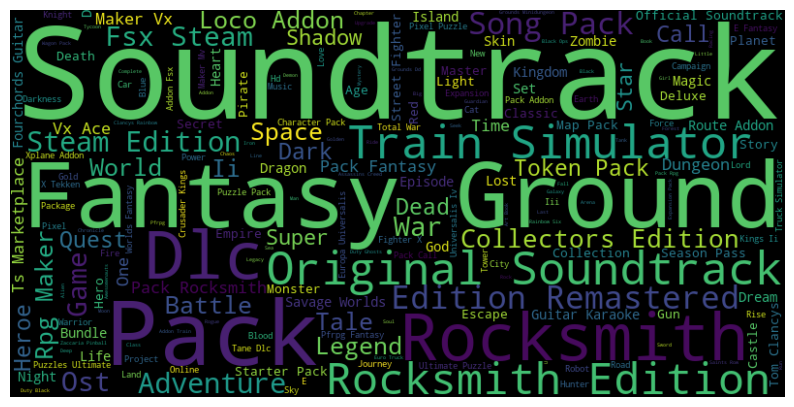

In [7]:
wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

La una nube de palabras es una técnica visual útil para resumir y resaltar las palabras más frecuentes o significativas en un conjunto de datos de texto. En este caso para la columa app_name que contiene el nombre de los video juegos se puede visualizar las palabras mas frecuentes usadas en los títulos

Columna Price:

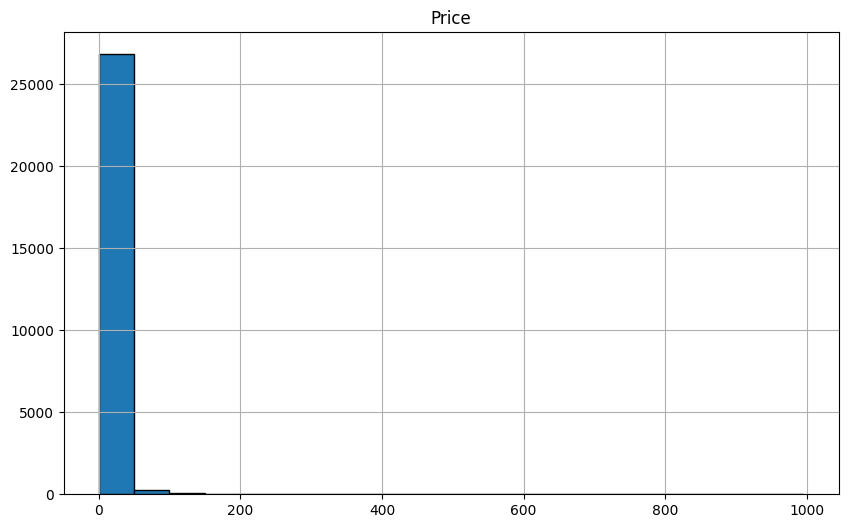

In [8]:
columnas = ['Price']
df[columnas].hist(bins=20, figsize= (10, 6),edgecolor='black')
plt.show()

El histograma nos permite visualizar la distribucion de frecuencia de los datos.Es decir como se distribuyen los valores
La frecuencia se representa en el eje y, mientras que los intervalos de valores se representan en el eje x.
Se observa un sesgo a la  claramente a la izquierda esto significa que hay una distribución asimétrica de los datos  Esto puede indicar que hay valores atípicos o extremadamente altos en el conjunto de datos que están desplazando la distribución hacia la derecha.que vamos a tener que analizar

Outliers:

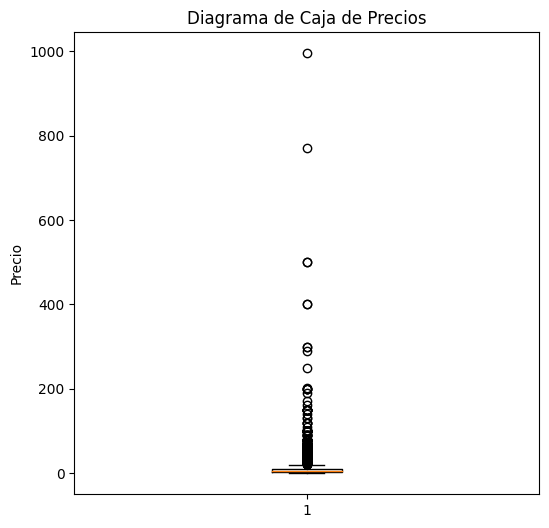

In [9]:
plt.figure(figsize=(6, 6),)
plt.boxplot(df['Price'])
plt.ylabel('Precio')
plt.title('Diagrama de Caja de Precios')
plt.show()

Se puede ver una clara prescencia de outliars sin embargo entrando a la página de Steam y buscando información en internet es muy normal de encontrarse con juegos que valen 1$ o de acceso libre a juegos que salen 1000$ y mas tambien.Por eso decido dejarlos y no darles tratamiento.

In [10]:
#Rango de precios
price_range = df['Price'].max() - df['Price'].min()
print("Precio Máximo:", df['Price'].max())
print("Precio Mínimo:", df['Price'].min())
print("Rango de Precios:", price_range)

Precio Máximo: 995.0
Precio Mínimo: 0.0
Rango de Precios: 995.0


Precio Máximo: 995.0
Precio Mínimo: 0.0
Rango de Precios: 995.0


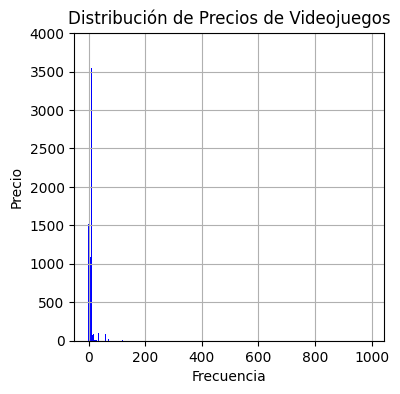

In [11]:
# Calcular el rango de precios
price_range = df['Price'].max() - df['Price'].min()

# Imprimir información
print("Precio Máximo:", df['Price'].max())
print("Precio Mínimo:", df['Price'].min())
print("Rango de Precios:", price_range)

# Obtener los valores únicos de los precios
unique_prices = df['Price'].unique()

# Calcular la frecuencia de cada precio
price_counts = df['Price'].value_counts()

# Crear el gráfico de barras 
plt.figure(figsize=(4, 4))
plt.bar(unique_prices, price_counts[unique_prices], color='blue')
plt.title('Distribución de Precios de Videojuegos')
plt.xlabel('Frecuencia')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

podemos ver que el precio max encontrado es de 995 y el minimo serian los free play de 0.00

In [12]:
def rango_precios(df):
    rangos = {
        "0-60": 0,
        "61-100": 0,
        "101 o más": 0
    }
    for precio in df['Price']:
        if precio >= 0 and precio <= 60:
            rangos["0-60"] += 1
        elif precio <= 100:
            rangos["61-100"] += 1
        else:
            rangos["101 o más"] += 1
    
    return rangos

resultados = rango_precios(df)
for rango, cantidad in resultados.items():
    print(f"{rango}: {cantidad}")

0-60: 27041
61-100: 103
101 o más: 35


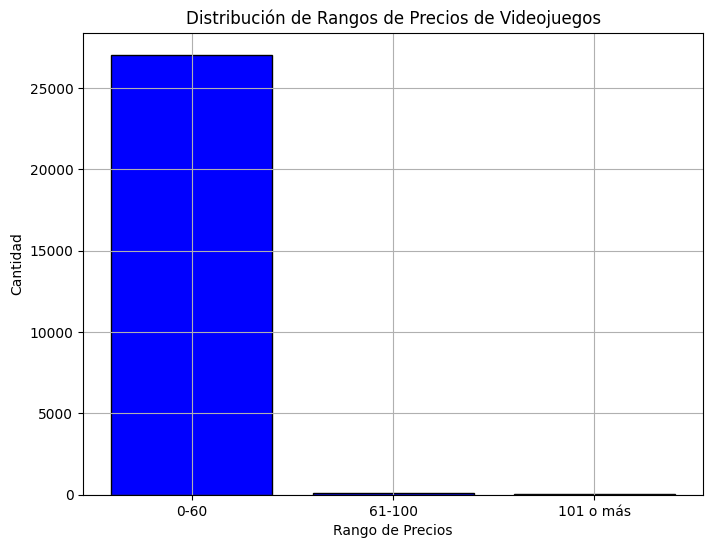

In [13]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(resultados.keys(), resultados.values(), color='blue',edgecolor='black')
plt.title('Distribución de Rangos de Precios de Videojuegos')
plt.xlabel('Rango de Precios')
plt.ylabel('Cantidad')
plt.grid(True)
plt.show()

Realizo un estudio de los intervalos  en los precios para ver donde hay mayor concentración de juegos por precio.Se puede ver que de 0 a 60 es donde se concentran mas(27041).

Columna Specs:

In [14]:
# Contar la cantidad de juegos para cada categoría
single_player_count = df[df['Specs'].str.contains('Single-player', case=False)]['Specs'].count()
multi_player_count = df[df['Specs'].str.contains('Multi-player', case=False)]['Specs'].count()
online_multiplayer_count = df[df['Specs'].str.contains('Online Multi-Player', case=False)]['Specs'].count()
SMO_count = df[df['Specs'].str.contains('Single-player, Multi-player, Online Multi-Play..', case=False)]['Specs'].count()
print(f'Cantidad de juegos Single-player: {single_player_count}')
print(f'Cantidad de juegos Multi-player: {multi_player_count}')
print(f'Cantidad de juegos Online Multi-Player: {online_multiplayer_count}')
print(f'Cantidad de juegos SMO: {SMO_count}')

Cantidad de juegos Single-player: 24486
Cantidad de juegos Multi-player: 8553
Cantidad de juegos Online Multi-Player: 2070
Cantidad de juegos SMO: 1141


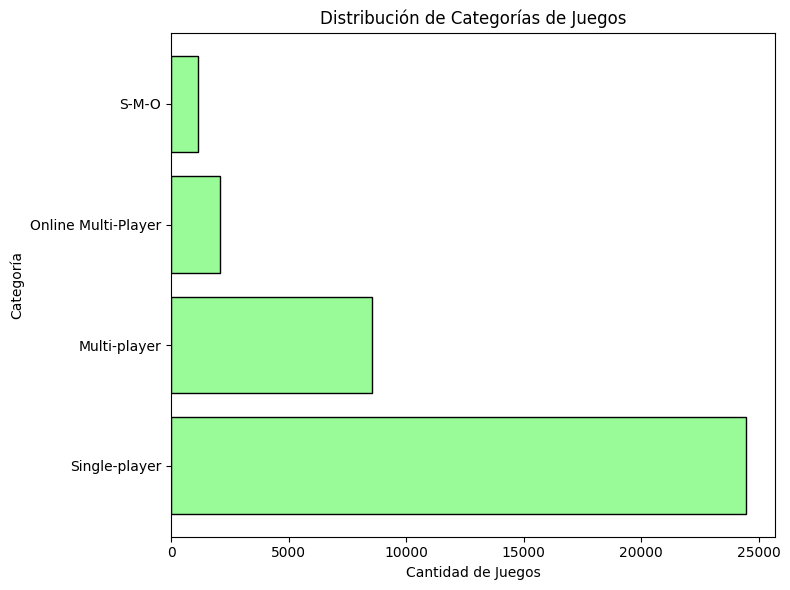

In [15]:
# Crear el gráfico de barras
categorias = ['Single-player', 'Multi-player', 'Online Multi-Player','S-M-O']
conteos = [single_player_count, multi_player_count, online_multiplayer_count,SMO_count]

plt.figure(figsize=(8, 6))
plt.barh(categorias, conteos, color='#98FB98',edgecolor='black')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Categoría')
plt.title('Distribución de Categorías de Juegos')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Siguiendo las especificaciones hice un gráfico para ver cuales eran las mas frecuentes podemos ver que Single-Player es la especificacion mas frecuente en los juegos.  

In [16]:
# Contar la cantidad de juegos para cada categoría
Action_count = df[df['Genres'].str.contains('Action', case=False)]['Genres'].count()
Indie_count = df[df['Genres'].str.contains('Indie', case=False)]['Genres'].count()
Strategy_count = df[df['Genres'].str.contains('Strategy', case=False)]['Genres'].count()
Sport_count = df[df['Genres'].str.contains('Sport', case=False)]['Genres'].count()
Adventure_count = df[df['Genres'].str.contains('Adventure', case=False)]['Genres'].count()
Simulation_count = df[df['Genres'].str.contains('Simulation', case=False)]['Genres'].count()
RPG_count = df[df['Genres'].str.contains('RPG', case=False)]['Genres'].count()
print(f'Cantidad de juegos Action: {Action_count}')
print(f'Cantidad de juegos Indie: {Indie_count}')
print(f'Cantidad de juegos Strategy: {Strategy_count}')
print(f'Cantidad de juegos Sport: {Sport_count}')
print(f'Cantidad de juegos Adventure: {Adventure_count}')
print(f'Cantidad de juegos Simulation: {Simulation_count}')
print(f'Cantidad de juegos RPG: {RPG_count}')

Cantidad de juegos Action: 10636
Cantidad de juegos Indie: 15075
Cantidad de juegos Strategy: 6669
Cantidad de juegos Sport: 1204
Cantidad de juegos Adventure: 7776
Cantidad de juegos Simulation: 6491
Cantidad de juegos RPG: 5105


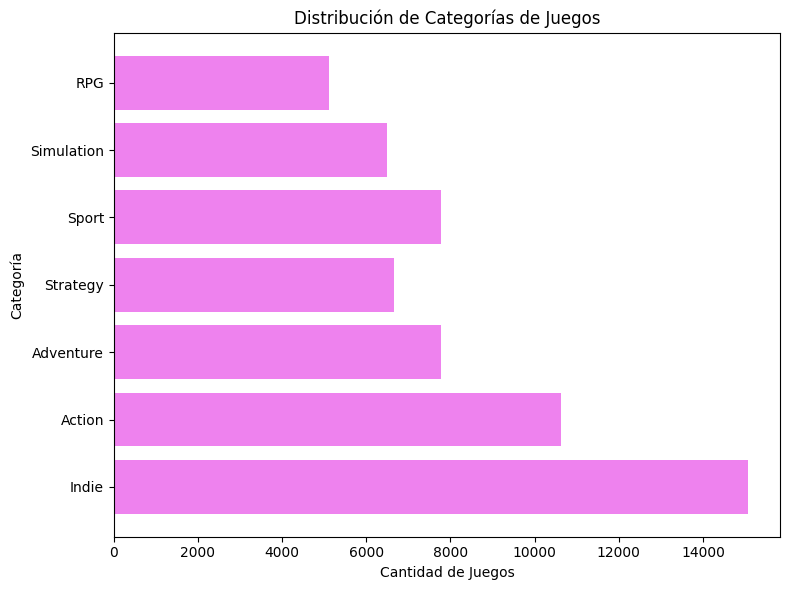

In [17]:
# Crear el gráfico de barras
categorias = ['Indie','Action','Adventure', 'Strategy','Sport','Simulation','RPG','Sport']
conteos = [Indie_count, Action_count,Adventure_count,Strategy_count,Adventure_count,Simulation_count,RPG_count,Sport_count]

plt.figure(figsize=(8, 6))
plt.barh(categorias, conteos, color='#EE82EE')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Categoría')
plt.title('Distribución de Categorías de Juegos')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Hice el gráfico para poder visualizar que generos se ocupan mas a la hora de desarrolar un juego.

Columna Publisher:

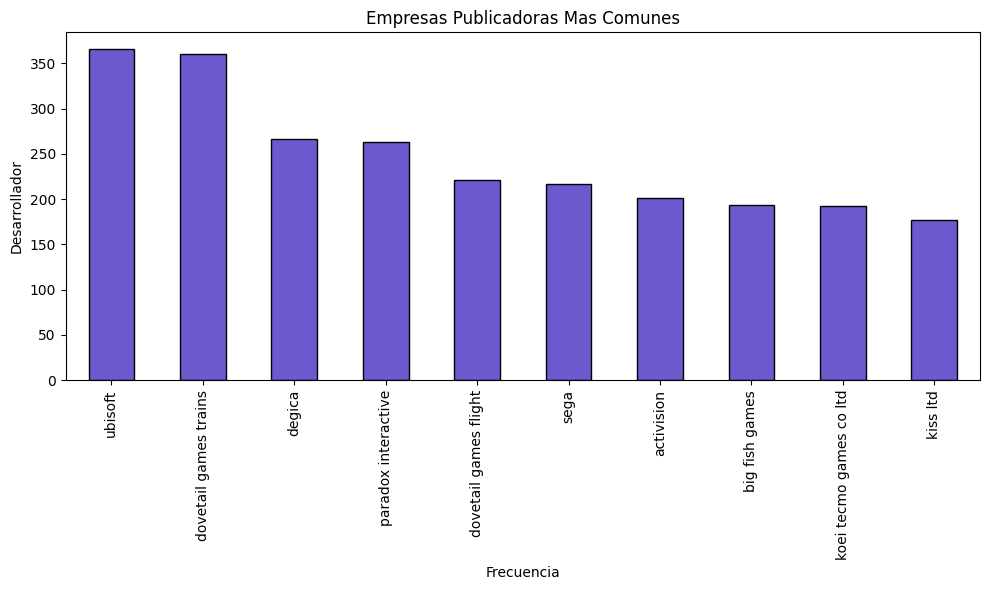

In [18]:
# Normalizar los nombres de las empresas publicadoras del contenido:
def normalize_developer_name(name):
    if isinstance(name, str):  # Verificar si es una cadena antes de normalizar
        cleaned_name = re.sub(r'[^a-zA-Z\s]', '', name)
        normalized_name = re.sub(r'\s+', ' ', cleaned_name.lower().strip())
        return normalized_name
    else:
        return name

df['Publisher'] = df['Publisher'].apply(normalize_developer_name)
# Filtrar las filas con valor 'sin informacion'
filtered_df = df[df['Publisher'] != normalize_developer_name('nan')]


# Contar las categorías más comunes y obtener las 10 primeras
top_categories = filtered_df['Publisher'].value_counts().nlargest(10)

# Crear un gráfico de barras invertido
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='#6A5ACD',edgecolor='black')
plt.xlabel('Frecuencia')
plt.ylabel('Desarrollador')
plt.title('Empresas Publicadoras Mas Comunes')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

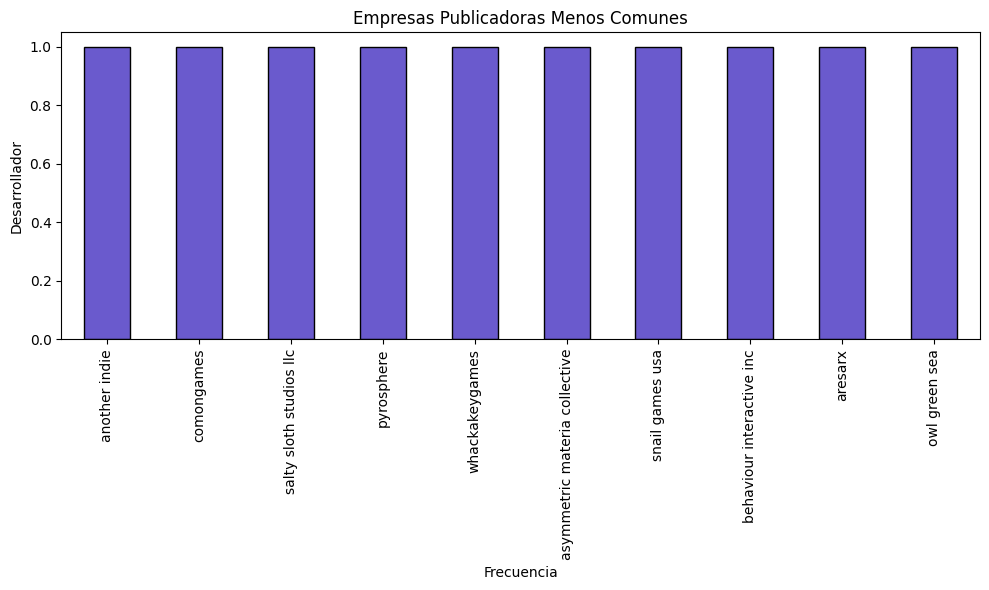

In [19]:
df['Publisher'] = df['Publisher'].apply(normalize_developer_name)
# Filtrar las filas con valor 'sin informacion'
filtered_df = df[df['Publisher'] != normalize_developer_name('nan')]


# Contar las categorías más comunes y obtener las 10 primeras
top_categories = filtered_df['Publisher'].value_counts().nsmallest(10)

# Crear un gráfico de barras invertido
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='#6A5ACD',edgecolor='black')
plt.xlabel('Frecuencia')
plt.ylabel('Desarrollador')
plt.title('Empresas Publicadoras Menos Comunes')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Los gráficos de arriba se puede viualizar primero las 10 empresas que mas publican contenido y en el de abajo venos las 10 que menos publicaciones tienen. Entre las que mas publican estan : ubisoft,dovetail,paradox interactive,degica,sega

Columna Developer:

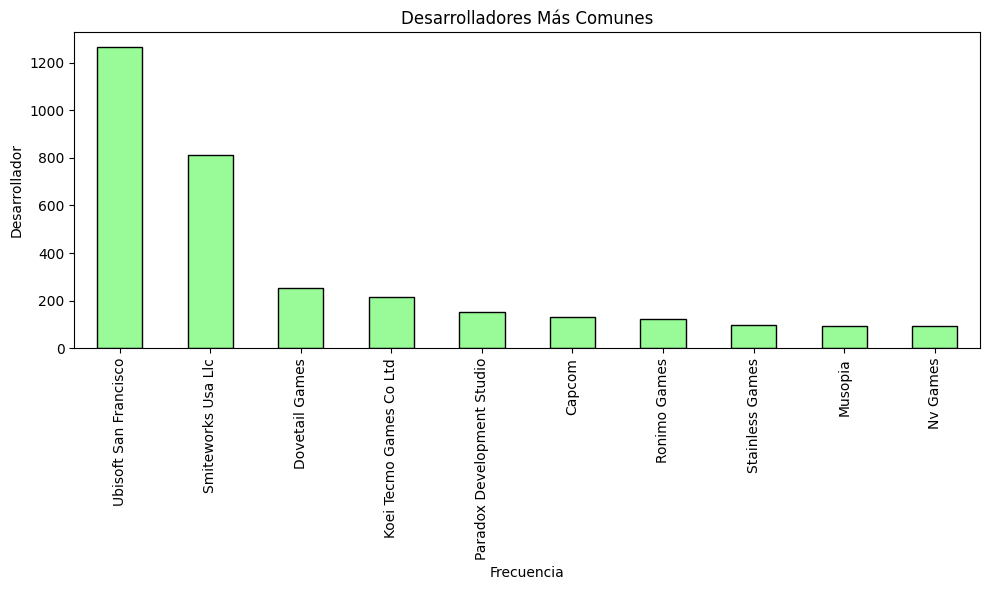

In [20]:

# Filtrar las filas con valor 'sin informacion'
filtered_df = df[df['Developer'] != normalize_developer_name('nan')]

# Contar las categorías más comunes y obtener las 10 primeras
top_categories = filtered_df['Developer'].value_counts().nlargest(10)

# Crear un gráfico de barras invertido
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='#98FB98',edgecolor='black')
plt.xlabel('Frecuencia')
plt.ylabel('Desarrollador')
plt.title('Desarrolladores Más Comunes')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_9184\128989206.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


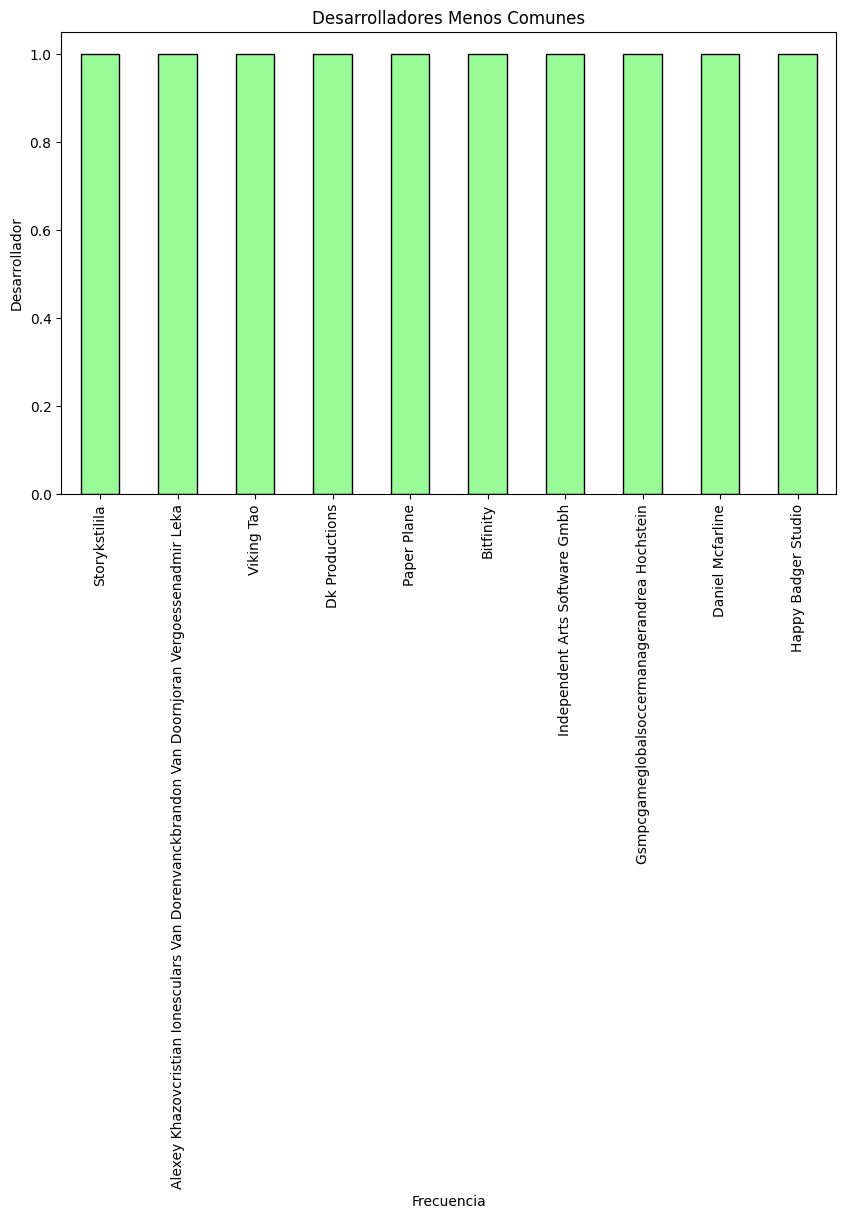

In [21]:
filtered_df = df[df['Developer'] != 'nan']

# Contar las categorías más comunes y obtener las 10 primeras
top_categories = filtered_df['Developer'].value_counts().nsmallest(10)

# Crear un gráfico de barras invertido
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='#98FB98',edgecolor='black')
plt.xlabel('Frecuencia')
plt.ylabel('Desarrollador')
plt.title('Desarrolladores Menos Comunes')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Tambien se realizo un gráfico de barras para visualizar cuales eran las empresas que tenian mas juegos desarrollados y cuales menos.

Se pudo sacar una conclusión tambien que muchas de las empresas que desarrollan los juego tambien son las que los publican como se puede ver que sucede con :ubisoft,dovetail,paradox.

Columna early_access

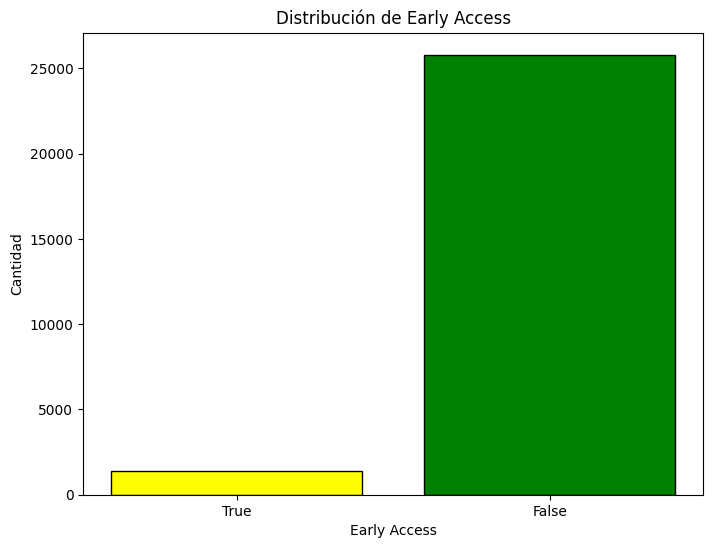

In [22]:
# Contar los valores True y False en la columna 'early_access'
true_count = df['Early_Access'].sum()
false_count = len(df) - true_count

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(['True', 'False'], [true_count, false_count], color=['yellow', 'green'],edgecolor='black')
plt.xlabel('Early Access')
plt.ylabel('Cantidad')
plt.title('Distribución de Early Access')
plt.show()

Aca podemos ver que la mayor parte de los juegos lanzados no tienen early_access(Modalidad de financiación en la que los jugadores compran un videojuego cuando todavía se encuentra en fase de desarrollo).

Juego con mayor precio:

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_9184\2891089480.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top_games = df_sorted['App_Name'][:10]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_9184\2891089480.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top_prices = df_sorted['Price'][:10]


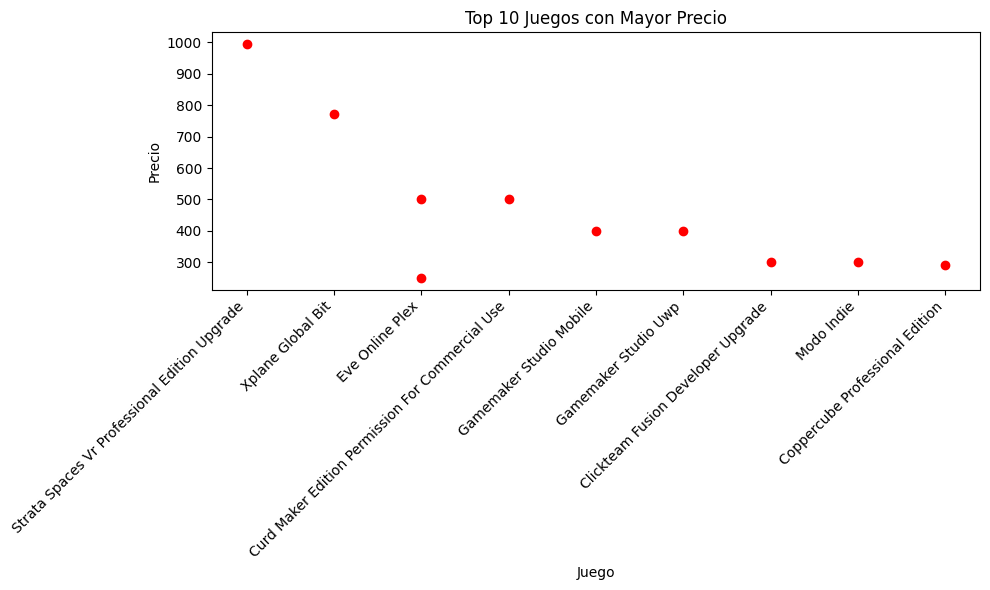

In [23]:
# Ordenar el DataFrame por precio de forma descendente
df_sorted = df.sort_values(by='Price', ascending=False)

# Obtener los nombres de los juegos y sus precios más altos
top_games = df_sorted['App_Name'][:10]
top_prices = df_sorted['Price'][:10]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(top_games, top_prices, color='red', marker='o')
plt.xlabel('Juego')
plt.ylabel('Precio')
plt.title('Top 10 Juegos con Mayor Precio')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [24]:
# Nombre del juego que busco
nombre_juego_buscar = 'Strata Spaces Vr Professional Edition Upgrade'

# Filtrar por vj y la columna para obtener información sobre el juego específico
juego_encontrado = df[df['App_Name'] == nombre_juego_buscar]

# Ver la información del juego encontrado
print(juego_encontrado)

       User_Id                                       App_Name Release_Date  \
10267   719000  Strata Spaces Vr Professional Edition Upgrade   2017-10-26   

       Release_Year  Price                                             Genres  \
10267          2017  995.0  Animation &amp; Modeling, Design &amp; Illustr...   

                                                   Specs  Early_Access  \
10267  Downloadable Content, Steam Achievements, Stea...         False   

                      Developer                 Publisher  
10267  Strata Mixed Reality Inc  strata mixed reality inc  


Resulta que el juego que se indica como mas caro no tiene los géneros mas usados tampoco la empresa desarrolladora ni la que pública el contenido se encuentra en las primeras 10.

Cual fuel año donde se publicaron mas juegos segun el dataset?

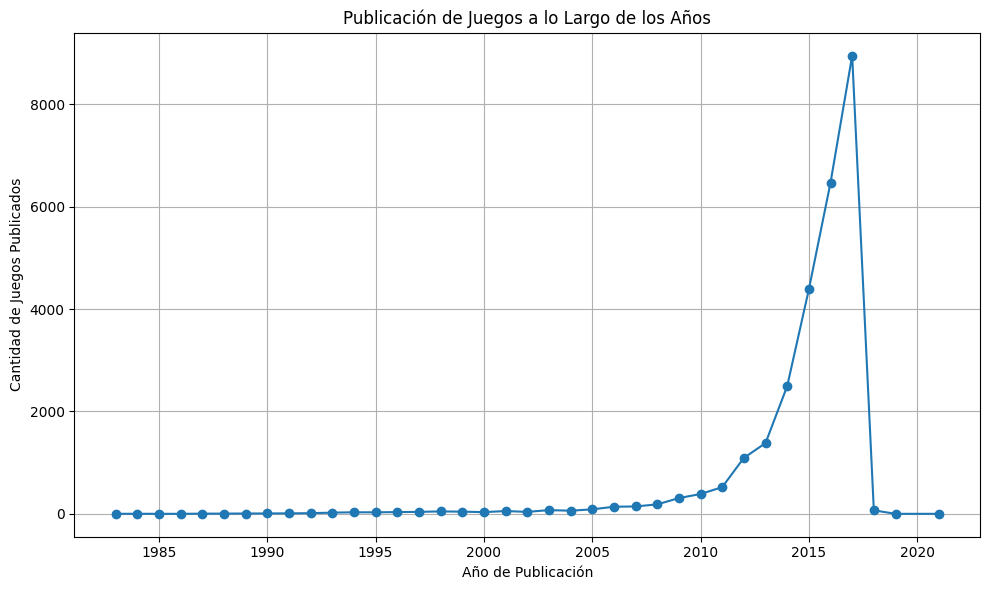

In [25]:
# Contar la cantidad de juegos publicados en cada año
publicaciones_por_año = df['Release_Year'].value_counts().sort_index()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(publicaciones_por_año.index, publicaciones_por_año.values, marker='o')
plt.xlabel('Año de Publicación')
plt.ylabel('Cantidad de Juegos Publicados')
plt.title('Publicación de Juegos a lo Largo de los Años')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [26]:
# Encontrar el valor mínimo (primer año) y el valor máximo (último año)
primer_año = df['Release_Year'].min()
último_año = df['Release_Year'].max()

print(f'Rango de años: {primer_año} - {último_año}')

Rango de años: 1983 - 2021


In [27]:
# Año que deseas buscar
año_buscar = 2020

# obtener registros del año específico
registros_año_específico = df[df['Release_Year'] == año_buscar]
registros_año_específico

,User_Id,App_Name,Release_Date,Release_Year,Price,Genres,Specs,Early_Access,Developer,Publisher


El 2015 se ve como un año de crecimiento máximo. Y nuestro dataset va desde el año 1983-2021.El año 2020 no presentan registros. 

Correlación entre las variables

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_9184\708332422.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


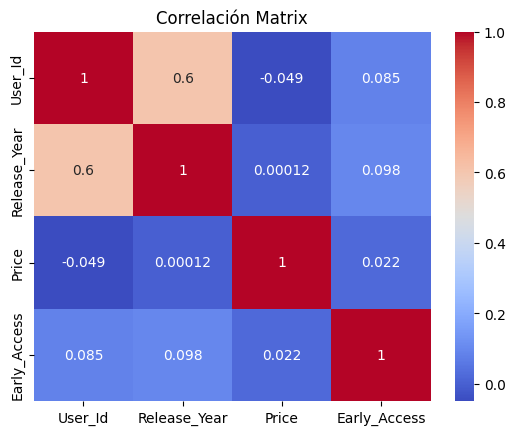

In [28]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación Matrix')
plt.show()

 El coeficiente de correlación es un valor que varía entre -1 y 1, y proporciona información sobre la fuerza y dirección de la relación entre las variables.El coeficiente de correlación tiene un rango de -1 a 1. Un valor cercano a 1 indica una correlación positiva fuerte, lo que significa que las variables tienden a aumentar juntas. Un valor cercano a -1 indica una correlación negativa fuerte, lo que significa que cuando una variable aumenta, la otra tiende a disminuir. Un valor cercano a 0 indica una correlación débil o nula.
  El gráfico nos muestra una relacion positiva entre la columna id y release_year.Los valores cercanos a 0 indican una correlación débil se puede ver en early acces y price, release_year y early_access y price.

Archivo users_items.csv

Diccionario:

- User_Id: Un identificador único para cada usuario.
  
- Item_Id: Un identificador único para cada juego.
  
- Item_Name: El nombre del juego.
  
- Playtime_Forever: La cantidad de tiempo que un usuario ha jugado a un juego en minutos

In [30]:
df2 = pd.read_csv('user_items.csv')

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_9184\1458966133.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('user_items.csv')


In [31]:
df2.shape

(2252533, 4)

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252533 entries, 0 to 2252532
Data columns (total 4 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   User_Id           object
 1   Item_Id           int64 
 2   Item_Name         object
 3   Playtime_Forever  int64 
dtypes: int64(2), object(2)
memory usage: 68.7+ MB


In [33]:
df2.head(50)

,User_Id,Item_Id,Item_Name,Playtime_Forever
0,76561197970982479,10,Counter-Strike,6
1,76561197970982479,20,Team Fortress Classic,0
2,76561197970982479,30,Day of Defeat,7
3,76561197970982479,40,Deathmatch Classic,0
4,76561197970982479,50,Half-Life: Opposing Force,0
5,76561197970982479,60,Ricochet,0
6,76561197970982479,70,Half-Life,0
7,76561197970982479,130,Half-Life: Blue Shift,0
8,76561197970982479,300,Day of Defeat: Source,4733
9,76561197970982479,240,Counter-Strike: Source,1853


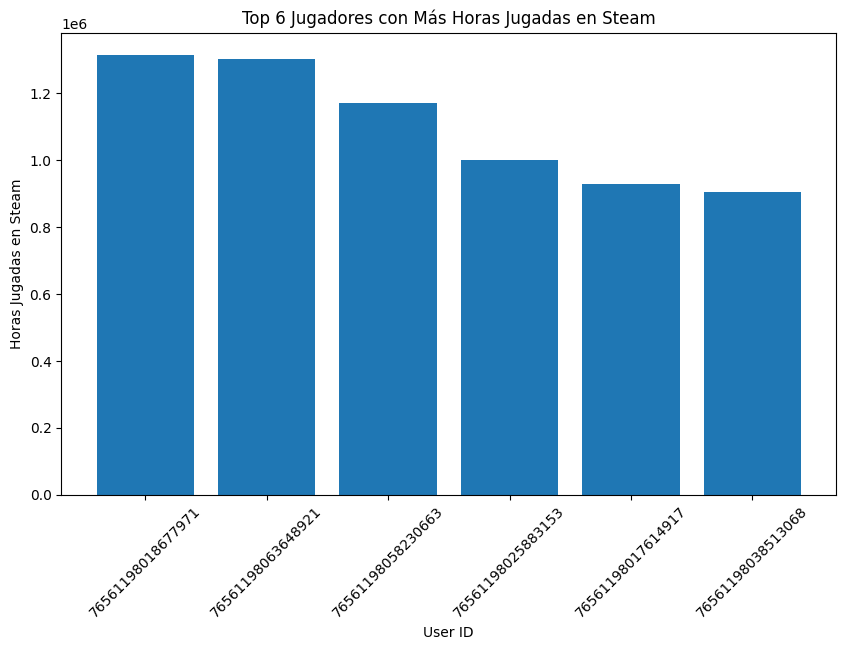

In [43]:
user_playtime = df2.groupby('User_Id')['Playtime_Forever'].sum().reset_index()
top_players = user_playtime.nlargest(6, 'Playtime_Forever')

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_players)), top_players['Playtime_Forever'])
plt.xlabel('User ID')
plt.ylabel('Horas Jugadas en Steam')
plt.title('Top 6 Jugadores con Más Horas Jugadas en Steam')
plt.xticks(range(len(top_players)), top_players['User_Id'], rotation=45)
plt.show()

Archivo user_reviews.csv

In [38]:
df3 = pd.read_csv('user_reviews.csv')

Diccionario:

- User_Id: Representa el identificador único de usuario.
- Posted: Indica la fecha en que se realizó una publicación o revisión.
- Item_Id: Es un identificador único para un juego.
- Recommend: Es un valor booleano que indica si la revisión recomienda o no el juego.
- Year: Muestra el año en que se realizó la revisión.
- Sentiment_Analysis: Es un valor numérico que  representa un análisis de sentimiento de la revisión.




In [39]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49186 entries, 0 to 49185
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   User_Id             49186 non-null  object
 1   Posted              49186 non-null  object
 2   Item_Id             49186 non-null  int64 
 3   Recommend           49186 non-null  bool  
 4   Year                49186 non-null  int64 
 5   Sentiment_Analysis  49186 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 1.9+ MB


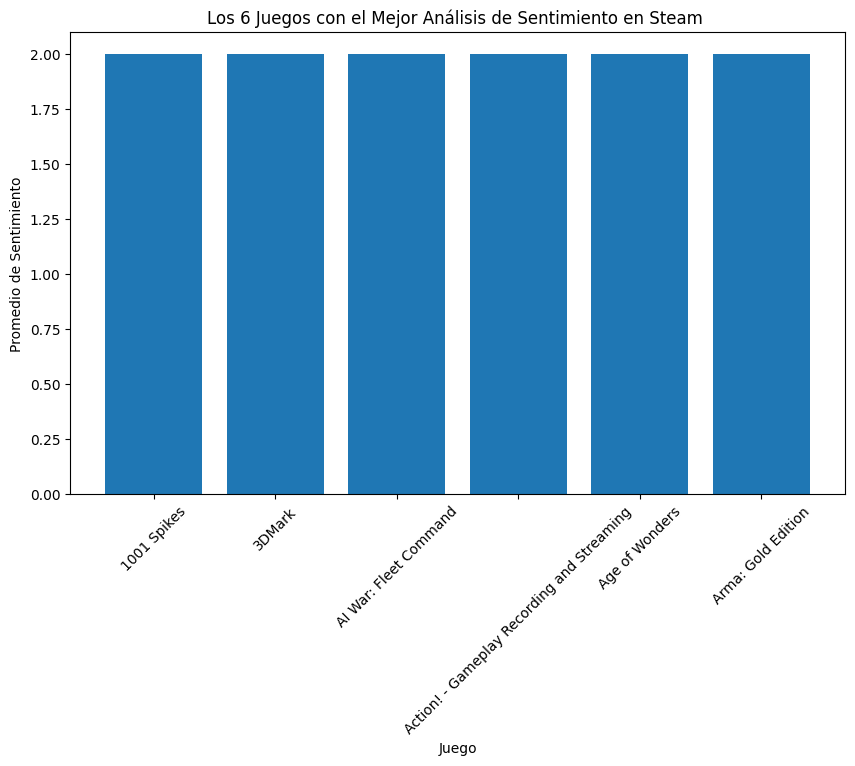

In [60]:
df2_sample = df2.sample(n=40000, random_state=42)
df3_sample = df3.sample(n=40000, random_state=42)


df_merged = df3_sample.merge(df2_sample[['Item_Id', 'Item_Name']], on='Item_Id', how='inner')
average_sentiment_by_game = df_merged.groupby('Item_Name')['Sentiment_Analysis'].mean().reset_index()
top_games_sentiment = average_sentiment_by_game.nlargest(6, 'Sentiment_Analysis')

# Paso 4: Crear el gráfico
plt.figure(figsize=(10, 6))
plt.bar(top_games_sentiment['Item_Name'], top_games_sentiment['Sentiment_Analysis'])
plt.xlabel('Juego')
plt.ylabel('Promedio de Sentimiento')
plt.title('Los 6 Juegos con el Mejor Análisis de Sentimiento en Steam ')
plt.xticks(rotation=45)
plt.show()

Usuarios con mayor cantidad de recomendaciones realizadas

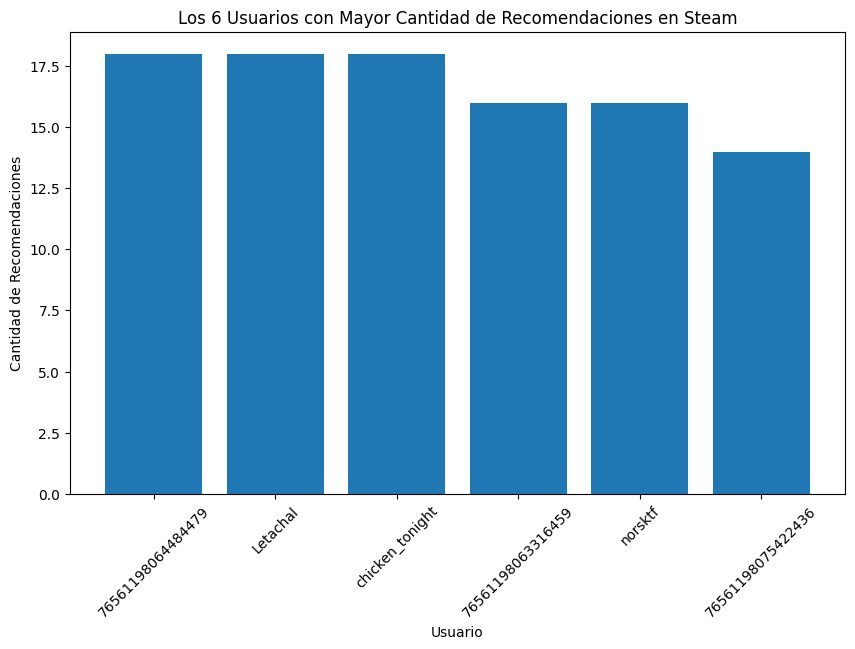

In [42]:

df3_recommended = df3[df3['Recommend'] == True]
user_recommendation_counts = df3_recommended.groupby('User_Id')['Recommend'].count().reset_index()
top_users_recommendations = user_recommendation_counts.nlargest(6, 'Recommend')


plt.figure(figsize=(10, 6))
plt.bar(top_users_recommendations['User_Id'], top_users_recommendations['Recommend'])
plt.xlabel('Usuario')
plt.ylabel('Cantidad de Recomendaciones')
plt.title('Los 6 Usuarios con Mayor Cantidad de Recomendaciones en Steam')
plt.xticks(rotation=45)
plt.show()

Se pueden ver los usuarios que mas recomendaciones tienen realizadas en steam.

Cuanto es el porcentaje de juegos recomendados y cuantos no lo son

In [56]:
recommend_percentages = df3['Recommend'].value_counts(normalize=True) * 100

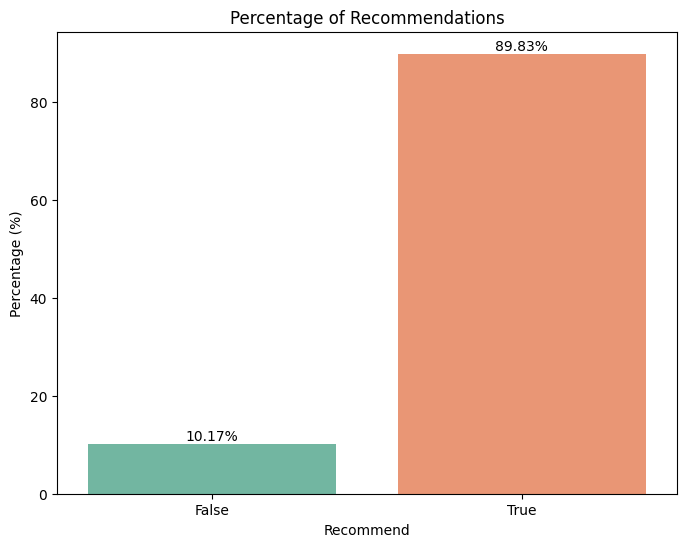

In [59]:
# Calcular los porcentajes de True y False en la columna 'Recommend'
recommend_percentages = df3['Recommend'].value_counts(normalize=True) * 100
recommend_percentages = recommend_percentages[::-1]


plt.figure(figsize=(8, 6))
sns.barplot(x=recommend_percentages.index, y=recommend_percentages.values, palette='Set2')
plt.xlabel('Recommend')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Recommendations')

for index, value in enumerate(recommend_percentages.values):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

plt.show()



Los juegos de steam presentan mas recomendaciones positivas que negativas. 